# 분석 가능 형태로 제작

In [2]:
import pandas as pd
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import os 

# 임의 데이터 형식 통일 
# 하나의 파일로 데이터 다 통합하기

"""뉴스 영상 스크래핑 구간 
위기발생 - 1달 ~ 위기 대응 + 1달

유튜브 영상 스크래핑 구간
1. 위기발생 전 2년 ~ 위기 발생 전날
2. 위기 발생 당일 ~ 위기 대응 전날
3. 위기 대응 날 ~ 1달"""

information = [["아이린","2020.10.20","2020.10.22"],["조현아","2014.12.05","2014.12.08"],["박나래","2021.03.24","2021.03.25"],["설현","2016.05.03","2016.05.12"],
               ["양팡","2020.08.05","2020.08.08"],["강민경","2020.07.15","2020.07.17"],["유희열","2022.06.14","2022.06.14"],
               ["홍진영","2020.11.05","2020.11.06"],["설민석","2020.12.29","2020.12.29"]]

for i in range(len(information)):
    information[i][1] = pd.to_datetime(information[i][1]).date()
    information[i][2] = pd.to_datetime(information[i][2]).date()



In [5]:
# 파일 df으로 read 시켜주기

naver = pd.read_csv("naver.csv")
naver_divided_comment = pd.read_csv("naver_divided_comment.csv")
yt_transcript = pd.read_csv("yt_transcript.csv")
yt_comment = pd.read_csv("yt_comment.csv")

In [6]:
yt_comment

,Video_ID,comment_text,comment_likes,comment_date,query
0,_Km-X6d1E-U,50%는 재량으로 표현할 수 있지만<br>다른 50%는 원판을 감안하고 봐달라는 것...,7451.0,2020-12-22T06:42:11Z,아이린
1,_Km-X6d1E-U,저런 포인트를 도대체 어떻게 잡는거지 ㅋㅋㅋㅋ,6342.0,2020-12-16T04:46:46Z,아이린
2,_Km-X6d1E-U,역시 표정묘사 하면 우리 씅 ㅋㅋㅋㅋㅋ<br>잘해 잘해,6193.0,2020-12-16T04:53:22Z,아이린
3,_Km-X6d1E-U,근데 승희 앞머리도 아니고 뒷머리가 왜케 잔디같이 삐죽삐죽한거에욬ㅋㅋㅋㅋㅋㅋ 병아리같다,2602.0,2020-12-20T08:36:33Z,아이린
4,_Km-X6d1E-U,왜 아무도 효정언니 웃음소리 얘기 안 해 ㅋㅋㅋㅋㅋㅅㅋ 거의 뭐 장난감 원숭이 인형...,1047.0,2020-12-20T01:27:04Z,아이린
...,...,...,...,...,...
20004,B66IxbBFQvI,잘한다ㅋ진짜 스타강사다,16.0,2020-12-20T07:15:13Z,설민석
20005,B66IxbBFQvI,설민석선생님 대단하십니다 정말,13.0,2021-05-19T17:05:42Z,설민석
20006,B66IxbBFQvI,"고등학교 때 제일 재미없고 지루했던 시간이 역사수업이였는데,역사샘이 설민석샘 절반만...",12.0,2022-01-15T02:14:01Z,설민석
20007,B66IxbBFQvI,설쌤 강의 다시 듣고싶어요,12.0,2021-07-08T15:47:05Z,설민석


In [7]:
yt_transcript

,Title,Video_ID,Publish Date,Views,Likes,Comments_Count,Transcript,query
0,Red Velvet - IRENE &amp; SEULGI &#39;Monster&#...,Ujb-gvqsoi0,2020-07-07T03:00:05Z,141237278,3846213.0,267142.0,내 움직임은 특이해 평범치 않아|1 2 5 to 7 난 어둠 속의 Dancer|온몸...,아이린
1,아이린 IRENE is effortlessly funny,vP2JRvncjfY,2019-12-13T09:59:26Z,6434524,171128.0,3175.0,or|아|아|뭐야|[음악]|[박수]|[음악]|으|예|er|[박수]|처음에는 약간 롱...,아이린
2,레드벨벳 아이컨택캠 (EYE CONTACT🎥) S2 EP5. &#39;아이린의 소확...,kpsuuAAaG48,2018-12-23T03:00:04Z,5594187,148780.0,7458.0,전을|아 비 차를 놓쳤어요|yeah 엄청|여걸 장에서 아시오|[음악]|알리지 언니가...,아이린
3,"[마이보그] 유튜브 새내기 아이린! 갈 곳을 잃은 손💦( 왓츠인마이백,지갑,가방,립...",lDJ89x2w-K4,2020-09-23T11:00:12Z,4375116,128239.0,NaN,[이 영상은 브랜드 협찬으로 제작되었습니다]\n어떻게 하는 거야?|여긴가?|안녕하세...,아이린
4,"카메라에 잡힌 본인 모습을 본 아이린 Irene reaction, see herse...",DExqdVP5Fcw,2019-01-30T05:44:23Z,4188599,47879.0,972.0,on|[박수]|er|we|we|you|you|아아아|아 wm 왜냐 아|[박수]|아 ...,아이린
...,...,...,...,...,...,...,...,...
268,2화 본편💖 이순신을 만나 진정한 영웅을 묻다 l 한국사 대모험 애니메이션🌺,YQisx_-C8Jg,2024-09-10T07:59:00Z,71661,597.0,75.0,"설쌤, 어떡하죠?|이럴 수가…|시간의 문이 그려지지 않아.|에이, 걱정 마세요.|학...",설민석
269,"3화 본편💖 도마 안중근, 일본 제국주의의 심장을 쏘다 l 한국사 대모험 애니메이션🌺",jBoiPA2BCpw,2024-09-17T08:00:29Z,65433,510.0,63.0,"도대체 정체가 뭐지?|나와라, 슈퍼 파워!|얍! 얍!|솟아라, 신비의 힘!|아, 이...",설민석
270,무신 정권의 무능함🗿 | 고려 최악의 암흑기😱 | 조선왕조실록 후속시리즈 [설민석...,oTYb3vx2SAw,2024-07-29T07:59:00Z,31070,397.0,31.0,[음악]|자 이렇게 해서 무신 집권기 이제|시작이|됩니다|무신 집권기이 고려시대|무...,설민석
271,장군에서 왕이 된 태조 이성계⚔ | 그리고 조선의 천재 설계자 정도전📐 [설민석의...,WU8WoZ_LyMM,2024-09-02T07:59:00Z,30490,375.0,10.0,[음악]|자 그러면 오늘 앉으신 지금이 순간|앉으신 관객 여러분들이 함께 여행할|시...,설민석


In [8]:
naver.loc[:,["Content", "comments", "query"]]

,Content,comments,query
0,[경향신문]수전 손택 : 영혼과 매혹다니엘 슈라이버 지음·한재호 옮김글항아리 | 5...,좋은 기사 감사합니다,아이린
1,[경향신문]그룹 레드벨벳의 멤버 아이린. SM엔터테인먼트 제공스타일리스트에게 ‘갑질...,"아이린 폭로 글에 좋아요 누른 계정들 : 레드벨벳 전 코디, 보그 9월호 에디터,...",아이린
2,[경향신문]오는 11일 데뷔를 앞둔 SM의 신인 4인조 걸그룹 에스파의 티저영상 ‘...,2차 창작물로 인해 생기는 심각한 문제들은 과연 염두하고 만드는건지... | 시대...,아이린
3,9일부터 10일까지 이틀간···“아시아 대중음악을 한 자리서 즐길 수 있는 교류의 ...,NaN,아이린
4,K팝 등 亞대중음악 한 자리에… 홈페이지 등서 실시간 스트리밍경북도가 문화체육관광부...,NaN,아이린
...,...,...,...
1257,역사 강사 설민석이 22일 자신의 유튜브 채널에 올린 영상. [유튜브 캡처]유명 역...,잘못을 인정하는 태도 너무 멋지십니다. 다시 돌아와 주세요. 선생님께서 역사강의에는...,설민석
1258,tvN '설민석의 벌거벗은 세계사'. [사진 CJ E&M]최근 역사 왜곡 논란을 부...,표절은 참 ... 인생 끝이네... 에휴 어쩌다 | 실망이네요 재밌게 가르치는 것보...,설민석
1259,설민석씨. [페이스북 캡처]최근 자신의 이름을 내건 역사 강의 방송에서 왜곡 논란을...,정말 웃기는군요. 우리나라 사회에서 석사 논문 표절 없이 쓰는 사람이 몇 퍼센트나 ...,설민석
1260,"장혜수 스포츠팀장토미 터커와 지미 존스, 두 소년이 있다. 터커는 양치질을 잘해 치...",재점찍재 설민석강사님같이 설명도 잘하고 수업시간에 집중할수있는 명석한강사님은 흔하지않아여,설민석


In [9]:
yt_transcript.loc[:,["Transcript", "query"]]

,Transcript,query
0,내 움직임은 특이해 평범치 않아|1 2 5 to 7 난 어둠 속의 Dancer|온몸...,아이린
1,or|아|아|뭐야|[음악]|[박수]|[음악]|으|예|er|[박수]|처음에는 약간 롱...,아이린
2,전을|아 비 차를 놓쳤어요|yeah 엄청|여걸 장에서 아시오|[음악]|알리지 언니가...,아이린
3,[이 영상은 브랜드 협찬으로 제작되었습니다]\n어떻게 하는 거야?|여긴가?|안녕하세...,아이린
4,on|[박수]|er|we|we|you|you|아아아|아 wm 왜냐 아|[박수]|아 ...,아이린
...,...,...
268,"설쌤, 어떡하죠?|이럴 수가…|시간의 문이 그려지지 않아.|에이, 걱정 마세요.|학...",설민석
269,"도대체 정체가 뭐지?|나와라, 슈퍼 파워!|얍! 얍!|솟아라, 신비의 힘!|아, 이...",설민석
270,[음악]|자 이렇게 해서 무신 집권기 이제|시작이|됩니다|무신 집권기이 고려시대|무...,설민석
271,[음악]|자 그러면 오늘 앉으신 지금이 순간|앉으신 관객 여러분들이 함께 여행할|시...,설민석


In [10]:
yt_comment.loc[:,["comment_text","query"]]

,comment_text,query
0,50%는 재량으로 표현할 수 있지만<br>다른 50%는 원판을 감안하고 봐달라는 것...,아이린
1,저런 포인트를 도대체 어떻게 잡는거지 ㅋㅋㅋㅋ,아이린
2,역시 표정묘사 하면 우리 씅 ㅋㅋㅋㅋㅋ<br>잘해 잘해,아이린
3,근데 승희 앞머리도 아니고 뒷머리가 왜케 잔디같이 삐죽삐죽한거에욬ㅋㅋㅋㅋㅋㅋ 병아리같다,아이린
4,왜 아무도 효정언니 웃음소리 얘기 안 해 ㅋㅋㅋㅋㅋㅅㅋ 거의 뭐 장난감 원숭이 인형...,아이린
...,...,...
20004,잘한다ㅋ진짜 스타강사다,설민석
20005,설민석선생님 대단하십니다 정말,설민석
20006,"고등학교 때 제일 재미없고 지루했던 시간이 역사수업이였는데,역사샘이 설민석샘 절반만...",설민석
20007,설쌤 강의 다시 듣고싶어요,설민석


In [11]:
# video_id로 댓글에 published date 달아주기
yt_comment = yt_comment.merge(yt_transcript.loc[:,["Video_ID","Publish Date"]], on="Video_ID",how="inner")

In [12]:
# df내 object들을 datetime object로 바꿔주기
naver["Date"] = pd.to_datetime(naver["Date"]).dt.date
yt_transcript["Publish Date"] = pd.to_datetime(yt_transcript["Publish Date"]).dt.date
yt_comment["Publish Date"] = pd.to_datetime(yt_comment["Publish Date"]).dt.date


In [13]:
import re

# 기간별로 text 나눠서 text 분석을 할 수 있도록 dictionary꼴로 만들어줌!
text_dictionary = {}

for info in information:
    query = info[0]

    naver_comment1 = naver.loc[(naver["query"]==query) & (naver["Date"] < info[1]) , "comments"]
    naver_comment1 = " ".join(naver_comment1.dropna().astype(str))

    naver_comment2 = naver.loc[(naver["query"]==query) & (naver["Date"] >= info[1]) & (naver["Date"] < info[2]), "comments"]
    naver_comment2 = " ".join(naver_comment2.dropna().astype(str))

    naver_comment3 = naver.loc[(naver["query"]==query) & (naver["Date"] >= info[2]), "comments"]
    naver_comment3 = " ".join(naver_comment3.dropna().astype(str))
    

    naver_content1 = naver.loc[(naver["query"]==query) & (naver["Date"] < info[1]) , "Content"]
    naver_content1 = " ".join(naver_content1.dropna().astype(str))

    naver_content2 = naver.loc[(naver["query"]==query) & (naver["Date"] >= info[1]) & (naver["Date"] < info[2]), "Content"]
    naver_content2 = " ".join(naver_content2.dropna().astype(str))

    naver_content3 = naver.loc[(naver["query"]==query) & (naver["Date"] >= info[2]), "Content"]
    naver_content3 = " ".join(naver_content3.dropna().astype(str))

    
    youtube_transcript1 = yt_transcript.loc[(yt_transcript["query"]==query) & (yt_transcript["Publish Date"] < info[1]) , "Transcript"]
    youtube_transcript1 = " ".join(youtube_transcript1.dropna().astype(str))

    youtube_transcript2 = yt_transcript.loc[(yt_transcript["query"]==query) & (yt_transcript["Publish Date"] >= info[1]) & (yt_transcript["Publish Date"] < info[2]) , "Transcript"]
    youtube_transcript2 = " ".join(youtube_transcript2.dropna().astype(str))
    
    youtube_transcript3 = yt_transcript.loc[(yt_transcript["query"]==query) & (yt_transcript["Publish Date"] >= info[2]) , "Transcript"]
    youtube_transcript3 = " ".join(youtube_transcript3.dropna().astype(str))

    youtube_comment1 = yt_comment.loc[(yt_comment["query"]==query) & (yt_comment["Publish Date"] < info[1]) , "comment_text"]
    youtube_comment1 = " ".join(youtube_comment1.dropna().astype(str))

    youtube_comment2 = yt_comment.loc[(yt_comment["query"]==query) & (yt_comment["Publish Date"] >= info[1]) & (yt_comment["Publish Date"] < info[2]) , "comment_text"]
    youtube_comment2 = " ".join(youtube_comment2.dropna().astype(str))
    
    youtube_comment3 = yt_comment.loc[(yt_comment["query"]==query) & (yt_comment["Publish Date"] >= info[2]) , "comment_text"]
    youtube_comment3 = " ".join(youtube_comment3.dropna().astype(str))

    new_dict = {
                "naver_comment1" : naver_comment1,"naver_comment2" : naver_comment2,"naver_comment3" : naver_comment3,
                "naver_content1" : naver_content1,"naver_content2" : naver_content2,"naver_content3" : naver_content3,
                "youtube_transcipt1" : youtube_transcript1,"youtube_transcipt2" : youtube_transcript2,"youtube_transcipt3" : youtube_transcript3, 
                "youtube_comment1" : youtube_comment1,"youtube_comment2" : youtube_comment2,"youtube_comment3" : youtube_comment3
                }
    text_dictionary[query] = new_dict

In [14]:
text_dictionary["아이린"]

{'naver_comment1': '좋은 기사 감사합니다 설겆이? | 바른말 표기 안합니까? 설거지가 바른말입니다..기사가 맞춤법부터 오류라니... |  설거지! |  평소 걷는 것을 좋아하는 편인데 항상 산티에고 순례길을 걷는 여행자들을 보며 동경의 마음을 키워왔던 것 같아요 걸으면서 생각을 정리하고 이치를 깨달을 수 있는 좋은 경험이 담긴 글 잘 읽었습니다 | 이런 기사를 읽을 때면 꼭 그곳을 방문하고 싶어지네요. 다른 사람을 의식할 필요가 없다, 결과를 걱정하지 말고 하고싶은 일을 해야겠다고 생각한 것은 정말 저에게도 필요한 생각이네요. | 일단 우리나라 먼저 다 걸어보고.. | 아이고의미없다 살아있을때나 잘하자 |  내평생 첨으로 내돈주고 레모나 사먹고 있습니다. 매일 미니방탄 볼수 있어서 좋아요. 레모나도 방탄 모델이후 성장률 반등했다니 반갑네요. 올해까지라니 몇통 더 사놔야겠어요 | 유재석때문에 비타500먹다가 bts레모나 보고 레모나로 바꿈 ㅎㅎㅎ | 사이다를 너무 많이 먹어서 피를 뽑으면 사이다가 나올수도 | 제주위 여사친 여동생 어머니가 bts팬입니다! 건강하고 건실해서 좋다고하네요! 비타민처럼 활기를 주는 bts칭찬합니다! 화이팅입니다! | BTS효과죠.사이다 한모금도 안하는데 칠성사이다 박스로 구매함.BTS땜시..브로마이드 준다고해서..BTS는 존재가 위로와 감동',
 'naver_comment2': '',
 'naver_comment3': ' 아이린 폭로 글에 좋아요 누른 계정들 : 레드벨벳 전 코디, 보그 9월호 에디터, 업계 탑 홍장현, 김희준 포토그래퍼, 보아 코디, 샤이니 전 코디, 네일 업계 탑 네일어니스텔라, 마리끌레르 에디터, gq 에디터, 싱글즈 에디터, 아이즈매거진 에디터, 에스팀 소속 모델들 | 녹취록 얼마나 쫄리면 반박하나 못하고 ㅋㅋㅋ | 원래 인성이 그런거니? 떠서 그런거니? | jyp 가서 몇 일간 진영이한테 인성교육 듣고와라  2차 창작물로 인해 생기는 심각한 문제들은 과연 염두하고 만드는건지... | 시대 역행

# 빈도분석

In [15]:
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords

kiwi = Kiwi()
stopwords = Stopwords()

# 전처리 코드

def do_Kr_preprocessing(text):
    filtered_content = re.sub('[^\s\w\d]',' ', text)
    kiwi_tokens = kiwi.tokenize(filtered_content, stopwords=stopwords)
    Noun_words = []
    for token in kiwi_tokens:
        if 'NN' in token.tag:
            Noun_words.append(token.form)
    # 길이가 1인 단어 제거 하기
    final_Noun_words = []
    for word in Noun_words:
        if len(word)>1:
            final_Noun_words.append(word)
    return final_Noun_words

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/var/folders/tf/02_6lkvd73nbp9k5fyfj80fh0000gn/T/ipykernel_58580/3145199806.py:10: SyntaxWarning: invalid escape sequence '\s'
  filtered_content = re.sub('[^\s\w\d]',' ', text)


In [16]:
from collections import Counter

# 빈도 분석!

columns = ['query', 'key', 'count']
freq_df = pd.DataFrame(columns=columns)


for info in information:
    query = info[0]
    for key in list(text_dictionary[query].keys()):
        conversion = text_dictionary[query][key]
        final_nouns = do_Kr_preprocessing(conversion)
        c = Counter(final_nouns)
        adding_df = pd.DataFrame({"query" : [query], "key" : [key], "count" : [str(c.most_common(10))]})
        freq_df = pd.concat([freq_df,adding_df], ignore_index=True)

freq_df.to_csv("frequency_analysis.csv",index=False)

# 군집화

In [17]:
columns = ['query', 'key', 'token']
NN_token_df = pd.DataFrame(columns=columns)

for info in information:
    query = info[0]
    for key in list(text_dictionary[query].keys()):
        conversion = text_dictionary[query][key]
        final_nouns = do_Kr_preprocessing(conversion)
        final_nouns = " ".join(final_nouns)
        adding_df = pd.DataFrame({"query" : [query], "key" : [key], "token" : [final_nouns]})
        NN_token_df = pd.concat([NN_token_df,adding_df],ignore_index=True)



In [18]:
NN_token_df

,query,key,token
0,아이린,naver_comment1,기사 감사 설겆이 바른말 표기 설거지 기사 맞춤법 오류 설거지 평소 산티에고 순례길...
1,아이린,naver_comment2,
2,아이린,naver_comment3,아이린 폭로 계정 레드 벨벳 코디 보그 에디터 업계 장현 김희준 포토그래퍼 코디 샤...
3,아이린,naver_content1,경향신문 수전 손택 영혼 매혹 다니엘 슈라이버 한재호 항아리 수전 손택 세상 미국 ...
4,아이린,naver_content2,
...,...,...,...
103,설민석,youtube_transcipt2,
104,설민석,youtube_transcipt3,음악 음악 음악 안녕 진서 스타 강사 이름 설민석 물의 당분간 활동 중단 설명 티비...
105,설민석,youtube_comment1,역사 무사 예전 이순신 장군 명량 설명 아줌마 영혼 리액션 태조 이성계 여진인 처음...
106,설민석,youtube_comment2,


In [35]:
# vectorize 시킬 수 있는 형태로 df내의 텍스트를 조작
naver_NN_comment = []
naver_NN_content = []
youtube_NN_transcript = []
youtube_NN_comment = []

startpoint = 0

for _ in range(9):
    idx_it = 0
    join_N_comment = ""
    join_N_content = ""
    join_Y_transcript = ""
    join_Y_comment = ""

    while idx_it < 12:
        check = idx_it // 3
        
        if check == 0:
            join_N_comment = join_N_comment + " " + NN_token_df.loc[startpoint + idx_it,"token"]
        if check == 1:
            join_N_content = join_N_content + " " + NN_token_df.loc[startpoint + idx_it,"token"]
        if check == 2:
            join_Y_transcript = join_Y_transcript + " " + NN_token_df.loc[startpoint + idx_it,"token"]      
        if check == 3:
            join_Y_comment = join_Y_comment + " " + NN_token_df.loc[startpoint + idx_it,"token"]      

        idx_it += 1
    
    naver_NN_comment.append(join_N_comment)
    naver_NN_content.append(join_N_content)
    youtube_NN_transcript.append(join_Y_transcript)
    youtube_NN_comment.append(join_Y_comment)

    startpoint += 12


In [21]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# pca 10으로 하고 효과적인 군집화 찾아주기

tfidf_vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1,1))
pca = PCA(n_components=9)

analyze = [naver_NN_comment, naver_NN_content, youtube_NN_transcript, youtube_NN_comment]
query_list = [i[0] for i in information]
analyze_list = ["naver_NN_comment", "naver_NN_content", "youtube_NN_transcript", "youtube_NN_comment"]

columns = ["type",'query','group']
cluster_df = pd.DataFrame(columns=columns)

idx_part = 0
for part in analyze:
    docs_vector = tfidf_vectorizer.fit_transform(part)
    docs_matrix = np.array(docs_vector.todense())
    pca_results_tfidf = pca.fit_transform(docs_matrix)

    sil_score = []
    for k in range(3,7):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster = kmeans.fit_predict(pca_results_tfidf) 
        score = silhouette_score(pca_results_tfidf, cluster)

        print(analyze_list[idx_part])
        print(k, score)

        sil_score.append([k, score])

    max_cluster = max(sil_score, key=lambda x: x[1])[0]
    kmeans = KMeans(n_clusters= max_cluster)
    clusters_pca_tfidf = kmeans.fit_predict(pca_results_tfidf)
    

    adding_df = pd.DataFrame({"type" : analyze_list[idx_part], "query" : query_list, "group" : list(clusters_pca_tfidf)})
    cluster_df = pd.concat([cluster_df,adding_df],ignore_index=True)
    idx_part += 1

    print("")
cluster_df.to_csv("cluster_analysis.csv",index=False)

naver_NN_comment
3 0.14802783056662056
naver_NN_comment
4 0.15494856229636528
naver_NN_comment
5 0.15432985581614223
naver_NN_comment
6 0.14709010939060607

naver_NN_content
3 0.03838612545903174
naver_NN_content
4 0.13060106387404488
naver_NN_content
5 0.12372612773309109
naver_NN_content
6 0.13289893596003688

youtube_NN_transcript
3 0.0784946373501488
youtube_NN_transcript
4 0.10531658404417749
youtube_NN_transcript
5 0.08442985893256064
youtube_NN_transcript
6 0.11526310366737685

youtube_NN_comment
3 0.026488737031044155
youtube_NN_comment
4 0.020700090271544347
youtube_NN_comment
5 0.006178539405308179
youtube_NN_comment
6 -0.017500073761669628



naver_NN_comment
3 0.780518821834218
naver_NN_comment
4 0.7108302169075558
naver_NN_comment
5 0.5952522638559667
naver_NN_comment
6 0.5271773271254614


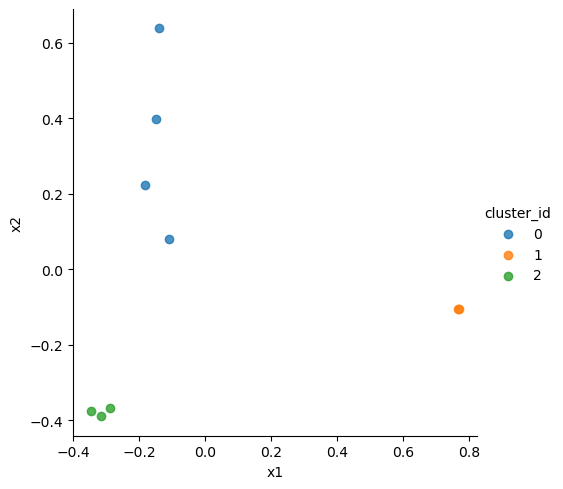


naver_NN_content
3 0.8026173758962939
naver_NN_content
4 0.5450817177988022
naver_NN_content
5 0.4176688175969069
naver_NN_content
6 0.4789083493021669


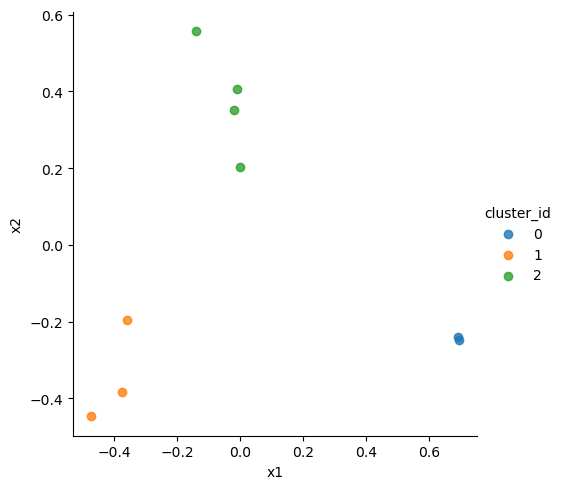


youtube_NN_transcript
3 0.5972349108275294
youtube_NN_transcript
4 0.5625259964731271
youtube_NN_transcript
5 0.4190948513291372
youtube_NN_transcript
6 0.43776944547054236


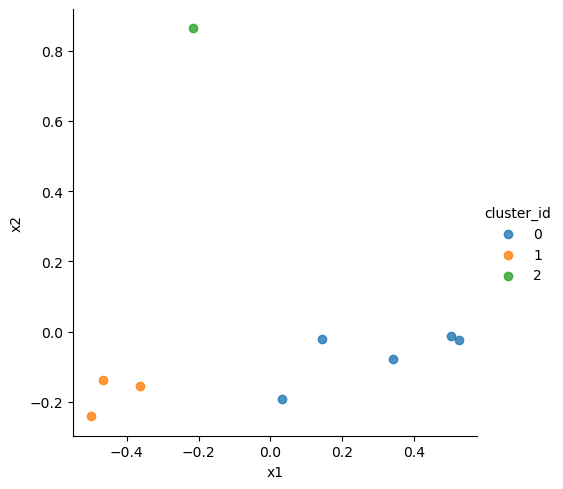


youtube_NN_comment
3 0.6216862938453267
youtube_NN_comment
4 0.44259503292394897
youtube_NN_comment
5 0.49839926393757256
youtube_NN_comment
6 0.4140159580335905


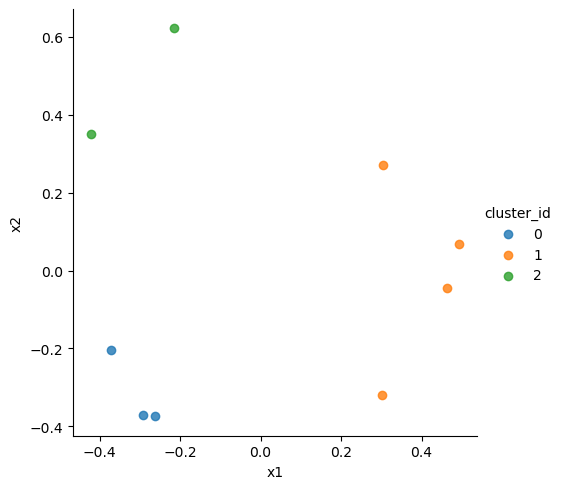

In [22]:
# pca 2로 해주고 시각화 해보기

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tfidf_vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1,1))
pca = PCA(n_components=2)

analyze = [naver_NN_comment, naver_NN_content, youtube_NN_transcript, youtube_NN_comment]
query_list = [i[0] for i in information]
analyze_list = ["naver_NN_comment", "naver_NN_content", "youtube_NN_transcript", "youtube_NN_comment"]

columns = ["type",'query','group']
cluster_df = pd.DataFrame(columns=columns)

idx_part = 0
for part in analyze:
    docs_vector = tfidf_vectorizer.fit_transform(part)
    docs_matrix = np.array(docs_vector.todense())
    pca_results_tfidf = pca.fit_transform(docs_matrix)

    sil_score = []
    for k in range(3,7):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster = kmeans.fit_predict(pca_results_tfidf) 
        score = silhouette_score(pca_results_tfidf, cluster)

        print(analyze_list[idx_part])
        print(k, score)

        sil_score.append([k, score])

    max_cluster = max(sil_score, key=lambda x: x[1])[0]
    kmeans = KMeans(n_clusters= max_cluster)
    clusters_pca_tfidf = kmeans.fit_predict(pca_results_tfidf)

    visualization = pd.DataFrame(pca_results_tfidf, columns=['x1','x2'])
    visualization['cluster_id'] = clusters_pca_tfidf.tolist()


    sns.lmplot(x='x1', y='x2', data= visualization, hue='cluster_id',fit_reg=False )
    plt.show()
    

    idx_part += 1

    print("")
    


# BERT Sentimental Analysis

In [23]:
import nltk
nltk.download("punkt")
from nltk.tokenize import sent_tokenize

columns = ["query","type","key", "text"]
sentence_df = pd.DataFrame(columns=columns)

# ID 는 뉴스는 url 유튜브는 unique id

for i in range(len(naver)):
    divide_sentence = naver.loc[i,"Content"]
    query = naver.loc[i,"query"]
    key = naver.loc[i,"URL"]
    type = "naver_content"
    
    if isinstance(divide_sentence, str):
        divide_sentence = sent_tokenize(divide_sentence)
    
    adding_df = pd.DataFrame({"query" : [query], "type" : [type],"key" : [key], "text" : [divide_sentence]}) 
    sentence_df = pd.concat([sentence_df, adding_df],ignore_index=True)

for i in range(len(naver_divided_comment)):
    divide_sentence = naver_divided_comment.loc[i,"comment"]
    query = naver_divided_comment.loc[i,"query"]
    key = naver_divided_comment.loc[i,"url"]
    type = "naver_comment"

    if isinstance(divide_sentence, str):
        divide_sentence = sent_tokenize(divide_sentence)

    adding_df = pd.DataFrame({"query" : [query], "type" : [type],"key" : [key], "text" : [divide_sentence]}) 
    sentence_df = pd.concat([sentence_df, adding_df],ignore_index=True)

for i in range(len(yt_transcript)):
    divide_sentence = yt_transcript.loc[i,"Transcript"]
    query = yt_transcript.loc[i,"query"]
    key = yt_transcript.loc[i,"Video_ID"]
    type = "youtube_content"

    if isinstance(divide_sentence, str):
        divide_sentence = divide_sentence.split("|")
    
    adding_df = pd.DataFrame({"query" : [query], "type" : [type],"key" : [key], "text" : [divide_sentence]}) 
    sentence_df = pd.concat([sentence_df, adding_df],ignore_index=True)

for i in range(len(yt_comment)):
    divide_sentence = yt_comment.loc[i,"comment_text"]
    query = yt_comment.loc[i,"query"]
    key = yt_comment.loc[i,"Video_ID"]
    type = "youtube_comment"

    if isinstance(divide_sentence, str):
        divide_sentence = divide_sentence.split("<br>")
    
    adding_df = pd.DataFrame({"query" : [query], "type" : [type],"key" : [key], "text" : [divide_sentence]}) 
    sentence_df = pd.concat([sentence_df, adding_df],ignore_index=True)

[nltk_data] Downloading package punkt to /Users/lee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline

model_name = "searle-j/kote_for_easygoing_people"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
pipe = TextClassificationPipeline(
        model=model,
        tokenizer=tokenizer,
        device=0, # gpu number, -1 if cpu used
        return_all_scores=True,
        function_to_apply='sigmoid'
    )

idx_finder =  ['불평/불만', '환영/호의', '감동/감탄', '지긋지긋', '고마움', '슬픔', '화남/분노', '존경', '기대감', '우쭐댐/무시함', '안타까움/실망', '비장함', '의심/불신', '뿌듯함', '편안/쾌적', '신기함/관심', '아껴주는', '부끄러움', '공포/무서움', '절망', '한심함', '역겨움/징그러움', '짜증', '어이없음', '없음', '패배/자기혐오', '귀찮음', '힘듦/지침', '즐거움/신남', '깨달음', '죄책감', '증오/혐오', '흐뭇함(귀여움/예쁨)', '당황/난처', '경악', '부담/안_내킴', '서러움', '재미없음', '불쌍함/연민', '놀람', '행복', '불안/걱정', '기쁨', '안심/신뢰']

senti_list = []

for i in range(len(sentence_df)):
    text_list = sentence_df.loc[i, "text"]
    senti_dict = [
        ['불평/불만', 0], ['환영/호의', 0], ['감동/감탄', 0], ['지긋지긋', 0], ['고마움', 0], ['슬픔', 0], ['화남/분노', 0],
        ['존경', 0], ['기대감', 0], ['우쭐댐/무시함', 0], ['안타까움/실망', 0], ['비장함', 0], ['의심/불신', 0], ['뿌듯함', 0],
        ['편안/쾌적', 0], ['신기함/관심', 0], ['아껴주는', 0], ['부끄러움', 0], ['공포/무서움', 0], ['절망', 0], ['한심함', 0],
        ['역겨움/징그러움', 0], ['짜증', 0], ['어이없음', 0], ['없음', 0], ['패배/자기혐오', 0], ['귀찮음', 0], ['힘듦/지침', 0],
        ['즐거움/신남', 0], ['깨달음', 0], ['죄책감', 0], ['증오/혐오', 0], ['흐뭇함(귀여움/예쁨)', 0], ['당황/난처', 0], ['경악', 0],
        ['부담/안_내킴', 0], ['서러움', 0], ['재미없음', 0], ['불쌍함/연민', 0], ['놀람', 0], ['행복', 0], ['불안/걱정', 0],
        ['기쁨', 0], ['안심/신뢰', 0]
    ]

    if isinstance(text_list, list):
        sentence_num = len(text_list)

        for txt in text_list:
            if len(txt) > 510:
                text_list[text_list.index(txt)] = txt[:511]

        results = pipe(text_list)

        for sent in results:
            for id in sent:
                if id["score"] > 0.4:
                    finder = idx_finder.index(id["label"])
                    senti_dict[finder][1] += id["score"]

        emergency = []
        for sent in senti_dict:
            if sent[1] > 0:
                sent[1] = sent[1] / sentence_num
                emergency.append(sent)

        senti_list.append(emergency)

    else:
        senti_list.append([""])
    
    print(len(senti_list))

sentence_df["sentiment"] = senti_list

# Function to validate and sort
def validate_and_sort(lst):
    if not isinstance(lst, list):  # Ensure lst is a list
        return []
    valid_items = [x for x in lst if isinstance(x, list) and len(x) > 1]  # Filter valid items
    return sorted(valid_items, key=lambda x: x[1], reverse=True)  # Sort in descending order

# Apply validation and sorting
sentence_df["sentiment"] = sentence_df["sentiment"].apply(validate_and_sort)

sentence_df.to_csv("sentimental_analysis.csv", index=False)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


## Sentiment data 결과 합치기

In [27]:
# 파일 df으로 read 시켜주기

naver = pd.read_csv("naver.csv")
naver_divided_comment = pd.read_csv("naver_divided_comment.csv")
yt_transcript = pd.read_csv("yt_transcript.csv")
yt_comment = pd.read_csv("yt_comment.csv")

In [28]:
merge1 = naver.loc[:,["Date","URL"]]
merge1.rename(columns={"URL": "key"}, inplace=True)

yt_transcript["Publish Date"] = yt_transcript["Publish Date"].apply(
    lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ").strftime("%Y.%m.%d"))

merge2 = yt_transcript.loc[:,["Publish Date","Video_ID"]]
merge2.rename(columns={"Publish Date" : "Date", "Video_ID" : "key"},inplace=True)

senti_df = pd.read_csv("sentimental_analysis.csv")
sent_out_yc = senti_df[senti_df["type"]!= "youtube_comment"]

In [29]:
key_match = pd.concat([merge1, merge2],ignore_index=True)

sent_out_yc = sent_out_yc.merge(
    key_match[['key', 'Date']],  # Take only 'key' and 'Date' columns
    on='key',                    # Merge on the 'key' column
    how='left'                   # Use 'left' join to keep all rows in sent_out_yc
)

yt_comment["comment_date"] = yt_comment["comment_date"].apply(
    lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ").strftime("%Y.%m.%d"))

In [30]:
import nltk
nltk.download("punkt")
from nltk.tokenize import sent_tokenize

columns = ["query","type","key", "text","Date"]
sentence_df = pd.DataFrame(columns=columns)    

for i in range(len(yt_comment)):
    divide_sentence = yt_comment.loc[i,"comment_text"]
    query = yt_comment.loc[i,"query"]
    key = yt_comment.loc[i,"Video_ID"]
    type = "youtube_comment"
    date = yt_comment.loc[i,"comment_date"]

    if isinstance(divide_sentence, str):
        divide_sentence = divide_sentence.split("<br>")
    
    adding_df = pd.DataFrame({"query" : [query], "type" : [type],"key" : [key], "text" : [divide_sentence],"Date":[date]}) 
    sentence_df = pd.concat([sentence_df, adding_df],ignore_index=True)

[nltk_data] Downloading package punkt to /Users/lee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
sentence_df["text"]= sentence_df["text"].apply(str)

sent_yc = senti_df[senti_df["type"]== "youtube_comment"]

sent_yc = sent_yc.merge(
    sentence_df[['key', "text",'Date']],  # Take only 'key' and 'Date' columns
    on= ['key', 'text'],                    # Merge on the 'key' column
    how='left'                   # Use 'left' join to keep all rows in sent_out_yc
)

sent_with_date = pd.concat([sent_out_yc,sent_yc],ignore_index=True)
sent_with_date_final = sent_with_date.dropna(subset=['Date'])

sent_with_date_final.to_csv("sent_with_date_final.csv",index=False)